<a href="https://colab.research.google.com/github/DatumLearning/Object_Segmentation_maskrcnn_pytorch-/blob/main/object_segmentation_maskrcnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights = "DEFAULT")

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

In [ ]:
model.eval()

In [ ]:
img = Image.open("/content/doggo.jpg")

In [ ]:
transform = T.ToTensor()
ig = transform(img)

In [ ]:
with torch.no_grad():
  pred = model([ig])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [ ]:
pred[0]["labels"] , pred[0]["scores"] , pred[0]["labels"].shape

(tensor([18,  2, 64,  3,  8,  2, 64, 31, 64, 64, 62, 47, 15,  2,  2, 64, 64, 15,
         27, 44, 64, 15, 15, 40,  2,  1, 15, 72,  3]),
 tensor([0.9966, 0.9937, 0.7310, 0.6487, 0.6039, 0.4188, 0.2963, 0.2517, 0.2252,
         0.1820, 0.1783, 0.1629, 0.1422, 0.1378, 0.1260, 0.1234, 0.1180, 0.1010,
         0.0986, 0.0819, 0.0811, 0.0795, 0.0719, 0.0653, 0.0576, 0.0532, 0.0522,
         0.0509, 0.0504]),
 torch.Size([29]))

In [ ]:
masks = pred[0]["masks"]

In [ ]:
masks.shape

torch.Size([29, 1, 576, 768])

In [ ]:
mask = masks[0 , 0]

In [ ]:
mask.unique()

tensor([0.0000e+00, 4.7645e-07, 9.5365e-07,  ..., 9.9996e-01, 9.9996e-01,
        9.9996e-01])

In [ ]:
mask = masks[0 , 0] > 0.5

In [ ]:
mask.unique()

tensor([False,  True])

In [ ]:
dog_mask = mask.numpy().astype("uint8") * 255

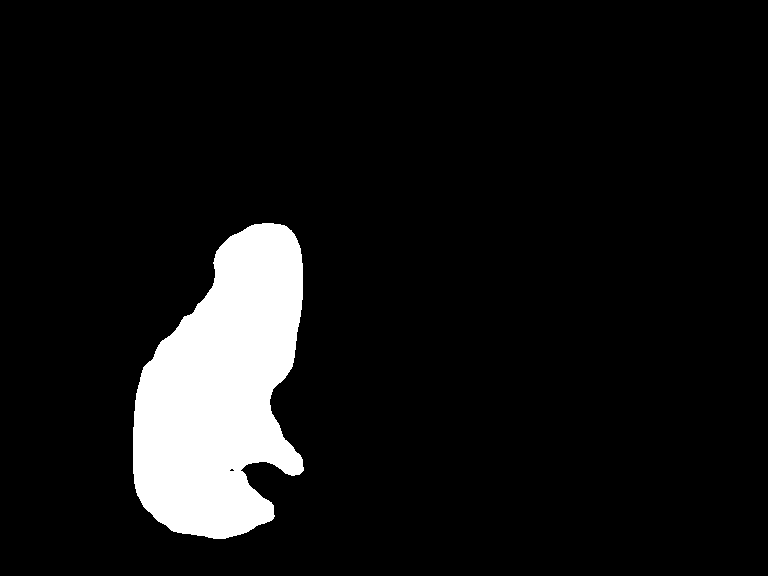

In [ ]:
cv2_imshow(dog_mask)

In [ ]:
igg = cv2.imread("/content/doggo.jpg")

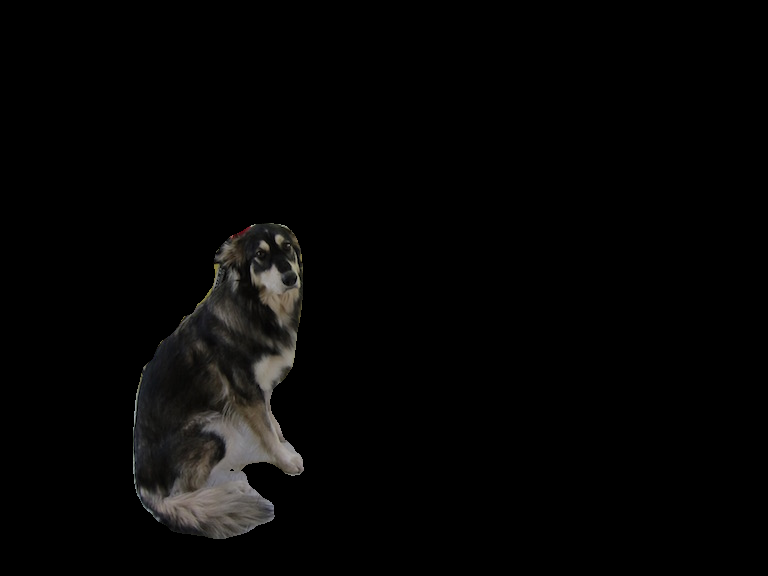

In [ ]:
fin_img = cv2.bitwise_and(igg , igg , mask = dog_mask)
cv2_imshow(fin_img)